# Working with Text Data - Preprocessing and Text to Numerical Vector

### Text Data

Text Analysis is a major application field for machine learning algorithms. Some of the major application areas of NLP are:
1. Spell Checker, Keyword Search, etc
2. Sentiment Analysis, Spam Classification
3. Machine Translation
4. Chatbots/Dialog Systems
5. Question Answering Systems
etc..

However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect numerical feature vectors with a fixed size rather than the raw text documents with variable length.

### Why NLP is hard?
1. Complexity of representation
2. Ambiguity in Natural Langugae


### Text Preprocessing

1. Tokenisation  
2. Removing special characters  
3. Convert sentence into lower case  
4. Removing stop words  
5. Stemming or Lemmatization


### Techniques to convert Text to Numerical Vectors

1. Bag of Words
2. TF IDF (Term Frequency - Inverse Document Frequency)
3. Word2Vec (by Google)
4. GloVe (Global Vectors by Stanford) - **Not Covered in this notebook**
5. FastText (by Facebook) - **Not Covered in this notebook**
6. ELMo (Embeddings from Language Models) - **Not Covered in this notebook**
7. BERT (Bidirectional Encoder Representations from Transformer) - **Not Covered in this notebook**

## Data Preparation

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lst_text = ['it Was the best oF Times $', 
            'It was The worst of times.',
            'IT 9 was tHe age Of wisdom', 
            'it was thE age of foolishness']

df = pd.DataFrame({'text': lst_text})

df.head()

,text
0,it Was the best oF Times $
1,It was The worst of times.
2,IT 9 was tHe age Of wisdom
3,it was thE age of foolishness


In [3]:
# !pip install nltk

In [4]:
# import nltk
# nltk.download('stopwords')
# Downloading wordnet before applying Lemmatizer
# nltk.download('wordnet')

In [5]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [6]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

In [7]:
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

## Text Preprocessing Steps

Text Preprocessing steps include some essential tasks to clean and remove the noise from the available data.

1. **Removing Special Characters and Punctuation**

2. **Converting to Lower Case** - We convert the whole text corpus to lower case to reduce the size of the vocabulary of our text data.

3. **Removing Stop Words** - Stopwords don't contribute to the meaning of a sentence. So, we can safely remove them without changing the meaning of the sentence. For eg: it, was, any, then, a, is, by, etc are the stopwords.

4. **Stemming or Lemmatization** - Stemming is the process of getting the root form of a word. For eg: warm, warmer, warming can be converted to warm.

In [8]:
raw_text = "This 1is Natural-LAnguage-Processing."
print(raw_text)

This 1is Natural-LAnguage-Processing.


In [9]:
# Removing special characters and digits
sentence = re.sub("[^a-zA-Z]", " ", raw_text)
print(sentence)

This  is Natural LAnguage Processing 


In [10]:
# change sentence to lower case
sentence = sentence.lower()
print(sentence)

this  is natural language processing 


In [11]:
# tokenize into words
tokens = sentence.split()
print(tokens)

['this', 'is', 'natural', 'language', 'processing']


In [12]:
# Removing stop words
clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
print(clean_tokens)

['natural', 'language', 'processing']


In [13]:
# Stemming
clean_tokens_stem = [stemmer.stem(word) for word in clean_tokens]
print(clean_tokens_stem)

['natur', 'languag', 'process']


In [14]:
# Lemmatizing
clean_tokens_lem = [lemmatizer.lemmatize(word) for word in clean_tokens]
print(clean_tokens_lem)

['natural', 'language', 'processing']


## Lets put it all together

In [15]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [16]:
temp_df = df['text'].apply(lambda x : preprocess(x, 'stem'))

temp_df.head()

,0,1
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [17]:
temp_df.columns = ['clean_text_stem', 'text_length_stem']

temp_df.head()

,clean_text_stem,text_length_stem
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolish,2


In [18]:
df = pd.concat([df, temp_df], axis=1)

df.head()

,text,clean_text_stem,text_length_stem
0,it Was the best oF Times $,best time,2
1,It was The worst of times.,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2
3,it was thE age of foolishness,age foolish,2


In [19]:
temp_df = df['text'].apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

,0,1
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolishness,2


In [20]:
temp_df.columns = ['clean_text_lemma', 'text_length_lemma']

temp_df.head()

,clean_text_lemma,text_length_lemma
0,best time,2
1,worst time,2
2,age wisdom,2
3,age foolishness,2


In [21]:
df = pd.concat([df, temp_df], axis=1)

df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
0,it Was the best oF Times $,best time,2,best time,2
1,It was The worst of times.,worst time,2,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2
3,it was thE age of foolishness,age foolish,2,age foolishness,2


## Bag of Word Representation

We call vectorization the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the Bag of Words or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

We will use `CountVectorizer` to **convert text into a matrix of token count**.

`Bag of Words`: https://machinelearningmastery.com/gentle-introduction-bag-words-model/

`Code Example`: https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/  

**We are going to perform below mentioned steps to understand the entire process:**  
a. Converting text to numerical vectors with the help of `CountVectorizer`  
b. Understand `fit` and `transform`  
c. Looking at `vocabulary_`  
d. Converting sparse matrix to dense matrix using `toarray()`  
e. Understanding `n_gram`  

### Advantages
1. It is simple to understand and implement like OneHotEncoding.
2. We have a fixed length encoding for any sequence of arbitrary length.
3. Documents with same words/vocabulary will have similar representation. So if two documents have a similar vocabulary, they’ll be closer to each other in the vector space and vice versa.

### Disadvantages
1. The size of vector increases with the size of the vocabulary. Thus, sparsity continues to be a problem. One way to control it is by limiting the vocabulary to n number of the most frequent words.
2. It does not capture the similarity between different words that mean the same thing. Say we have three documents: “walk”, “walked”, and “walking”. BoW vectors of all three documents will be equally apart.
3. This representation does not have any way to handle out of vocabulary (OOV) words (i.e., new words that were not seen in the corpus that was used to build the vectorizer).
4. As the name indicates, it is a “bag” of words. Word order information is lost in this representation. One way to control it is by using n-grams.
5. It suffers from **curse of high dimensionality.**

In [22]:
df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
0,it Was the best oF Times $,best time,2,best time,2
1,It was The worst of times.,worst time,2,worst time,2
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2
3,it was thE age of foolishness,age foolish,2,age foolishness,2


In [23]:
# Bag of Words

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.
vocab = CountVectorizer()

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.

dtm = vocab.fit_transform(df['clean_text_lemma'])

# fit_transform() could be done seperatly as mentioned below
# vocab.fit(df.clean_text_stem)
# dtm = vocab.transform(df.clean_text_stem)

In [24]:
# We can look at unique words by using 'vocabulary_'

vocab.vocabulary_

{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolishness': 2}

In [25]:
# Observe that the type of dtm is sparse

print(type(dtm))

<class 'scipy.sparse.csr.csr_matrix'>


In [26]:
# Lets now print the  shape of this dtm

print(dtm.shape)

# o/p -> (4, 6)
# i.e -> 4 documents and 6 unique words

(4, 6)


In [27]:
# Lets look at the dtm

print(dtm)

# Remember that dtm is a sparse matrix. i.e. zeros wont be stored
# Lets understand First line of output -> (0,1)    1
# Here (0, 1) means 0th document and 1st(index starting from 0) unique word. 
# (we have total 4 documents) & (we have total 6 unique words)
# (0, 1)    1 -> 1 here refers to the number of occurence of 1st word
# Now lets read it all in english.
# (0, 1)    1 -> 'times' occurs 1 time in 0th document. 
# Try to observe -> (3, 2)   1

  (0, 1)	1
  (0, 3)	1
  (1, 3)	1
  (1, 5)	1
  (2, 0)	1
  (2, 4)	1
  (3, 0)	1
  (3, 2)	1


In [28]:
# Since the dtm is sparse, lets convert it into numpy array.

print(dtm.toarray())

[[0 1 0 1 0 0]
 [0 0 0 1 0 1]
 [1 0 0 0 1 0]
 [1 0 1 0 0 0]]


In [29]:
vocabulary = vocab.vocabulary_

print(vocabulary)

print(vocabulary.keys())

sort_vocab_tup = sorted(vocabulary.items(), key = lambda x : x[1])

print(sort_vocab_tup)

sort_vocab = [tup[0] for tup in sort_vocab_tup]

print(sort_vocab)

{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolishness': 2}
dict_keys(['best', 'time', 'worst', 'age', 'wisdom', 'foolishness'])
[('age', 0), ('best', 1), ('foolishness', 2), ('time', 3), ('wisdom', 4), ('worst', 5)]
['age', 'best', 'foolishness', 'time', 'wisdom', 'worst']


In [30]:
sorted(vocab.vocabulary_)

['age', 'best', 'foolishness', 'time', 'wisdom', 'worst']

In [31]:
pd.DataFrame(dtm.toarray(), columns=sorted(vocab.vocabulary_))

,age,best,foolishness,time,wisdom,worst
0,0,1,0,1,0,0
1,0,0,0,1,0,1
2,1,0,0,0,1,0
3,1,0,1,0,0,0


In [32]:
# 2-grams

vocab = CountVectorizer(ngram_range=[1,2])

dtm = vocab.fit_transform(df.clean_text_stem)

In [33]:
print(vocab.vocabulary_)

{'best': 3, 'time': 6, 'best time': 4, 'worst': 8, 'worst time': 9, 'age': 0, 'wisdom': 7, 'age wisdom': 2, 'foolish': 5, 'age foolish': 1}


In [34]:
# convert sparse matrix to numpy array
print(dtm.toarray())

[[0 0 0 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 1 1]
 [1 0 1 0 0 0 0 1 0 0]
 [1 1 0 0 0 1 0 0 0 0]]


In [35]:
pd.DataFrame(dtm.toarray(), columns=sorted(vocab.vocabulary_))

,age,age foolish,age wisdom,best,best time,foolish,time,wisdom,worst,worst time
0,0,0,0,1,1,0,1,0,0,0
1,0,0,0,0,0,0,1,0,1,1
2,1,0,1,0,0,0,0,1,0,0
3,1,1,0,0,0,1,0,0,0,0


**Observations:**

- `vect.fit(lst_text)` **learns the vocabulary**
- `vect.transform(lst_text)` **uses the fitted vocabulary** to build a **document-term matrix**

## Term Frequency Inverse Document Frequency

In BOW approach all the words in the text are treated as equally important i.e. there's no notion of some words in the document being more important than others. TF-IDF, or term frequency-inverse document frequency, addresses this issue. It aims to quantify the importance of a given word relative to other words in the document and in the corpus.

In [36]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

dtm = vectorizer.fit_transform(df.clean_text_lemma)

In [37]:
print(vectorizer.vocabulary_)

{'best': 1, 'time': 3, 'worst': 5, 'age': 0, 'wisdom': 4, 'foolishness': 2}


In [38]:
print(dtm.toarray()) 

# convert sparse matrix to nparray

[[0.         0.78528828 0.         0.6191303  0.         0.        ]
 [0.         0.         0.         0.6191303  0.         0.78528828]
 [0.6191303  0.         0.         0.         0.78528828 0.        ]
 [0.6191303  0.         0.78528828 0.         0.         0.        ]]


In [39]:
pd.DataFrame(dtm.toarray(), columns=sorted(vectorizer.vocabulary_))

,age,best,foolishness,time,wisdom,worst
0,0.00000,0.785288,0.000000,0.61913,0.000000,0.000000
1,0.00000,0.000000,0.000000,0.61913,0.000000,0.785288
2,0.61913,0.000000,0.000000,0.00000,0.785288,0.000000
3,0.61913,0.000000,0.785288,0.00000,0.000000,0.000000


## Word2Vec

"You shall know the word by the company it keeps." by JR Firth

**Distributional Semantics (i.e. a word is characterized by the company it keeps)**  
W2v works well because there is an idea of meaning distribution in the context.

**Algorithms to generate Word2Vec Embeddings**
1. SkipGram
2. Continuous Bag of Words

**Issue**  
Even if the word is having three different meaning, W2v will return the weighted average of all three as the output. Now the question is, 
- Is it possible to segregate the three vectors to represent the words based in the context? 
$$ OR $$
- Is it possible to disambiguate the word vectors based on the context?

Word2Vec is not capturing the contextual information. This is where BERT comes handy.

In [14]:
import gensim

ModuleNotFoundError: No module named 'gensim'

**`! pip install gensim`**  
Run this in command promp (admin mode)

In [40]:
from gensim.models import Word2Vec

In [41]:
df['tokenised_sentences'] = df.clean_text_stem.apply(lambda sent : sent.split())

df.head()

,text,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma,tokenised_sentences
0,it Was the best oF Times $,best time,2,best time,2,"[best, time]"
1,It was The worst of times.,worst time,2,worst time,2,"[worst, time]"
2,IT 9 was tHe age Of wisdom,age wisdom,2,age wisdom,2,"[age, wisdom]"
3,it was thE age of foolishness,age foolish,2,age foolishness,2,"[age, foolish]"


In [42]:
list(df.tokenised_sentences)

[['best', 'time'], ['worst', 'time'], ['age', 'wisdom'], ['age', 'foolish']]

In [43]:
# train model

model = Word2Vec(list(df.tokenised_sentences), vector_size=100, min_count=1)

In [44]:
print(model)

Word2Vec(vocab=6, vector_size=100, alpha=0.025)


In [45]:
# Looking at the vocabulary

print(model.wv.key_to_index)

print(model.wv.index_to_key)

{'age': 0, 'time': 1, 'foolish': 2, 'wisdom': 3, 'worst': 4, 'best': 5}
['age', 'time', 'foolish', 'wisdom', 'worst', 'best']


In [46]:
# access the 100 dimensional vector for one of the words

print(model.wv.__getitem__('foolish'))

print(model.wv.__getitem__('foolish').shape)

[ 9.4563962e-05  3.0773187e-03 -6.8126465e-03 -1.3754654e-03
  7.6685809e-03  7.3464084e-03 -3.6732983e-03  2.6427007e-03
 -8.3171297e-03  6.2054847e-03 -4.6373224e-03 -3.1641079e-03
  9.3113566e-03  8.7338447e-04  7.4907015e-03 -6.0740639e-03
  5.1605059e-03  9.9228211e-03 -8.4573915e-03 -5.1356913e-03
 -7.0648384e-03 -4.8626517e-03 -3.7785650e-03 -8.5362010e-03
  7.9556061e-03 -4.8439382e-03  8.4236125e-03  5.2625705e-03
 -6.5500261e-03  3.9578700e-03  5.4701497e-03 -7.4265362e-03
 -7.4057197e-03 -2.4752307e-03 -8.6257271e-03 -1.5815735e-03
 -4.0343284e-04  3.2996845e-03  1.4418793e-03 -8.8142155e-04
 -5.5940580e-03  1.7303658e-03 -8.9737179e-04  6.7936899e-03
  3.9735888e-03  4.5294715e-03  1.4343048e-03 -2.6998566e-03
 -4.3668128e-03 -1.0320758e-03  1.4370275e-03 -2.6460099e-03
 -7.0737838e-03 -7.8053069e-03 -9.1217877e-03 -5.9351707e-03
 -1.8474245e-03 -4.3238713e-03 -6.4606713e-03 -3.7173224e-03
  4.2891572e-03 -3.7390448e-03  8.3781742e-03  1.5339922e-03
 -7.2423196e-03  9.43379

In [47]:
# Access the 100D vectors for all 6 words

print(model.wv.__getitem__(model.wv.index_to_key))

[[-5.3622725e-04  2.3643016e-04  5.1033497e-03  9.0092728e-03
  -9.3029495e-03 -7.1168090e-03  6.4588715e-03  8.9729885e-03
  -5.0154282e-03 -3.7633730e-03  7.3805046e-03 -1.5334726e-03
  -4.5366143e-03  6.5540504e-03 -4.8601604e-03 -1.8160177e-03
   2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488189e-03
   7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
   6.3508893e-03 -3.4053659e-03 -9.4640255e-04  5.7685734e-03
  -7.5216386e-03 -3.9361049e-03 -7.5115822e-03 -9.3004224e-04
   9.5381187e-03 -7.3191668e-03 -2.3337698e-03 -1.9377422e-03
   8.0774352e-03 -5.9308959e-03  4.5161247e-05 -4.7537349e-03
  -9.6035507e-03  5.0072931e-03 -8.7595871e-03 -4.3918253e-03
  -3.5099984e-05 -2.9618264e-04 -7.6612402e-03  9.6147414e-03
   4.9820566e-03  9.2331432e-03 -8.1579182e-03  4.4957972e-03
  -4.1370774e-03  8.2453492e-04  8.4986184e-03 -4.4621779e-03
   4.5175003e-03 -6.7869616e-03 -3.5484887e-03  9.3985079e-03
  -1.5776539e-03  3.2137157e-04 -4.1406299e-03 -7.6826881e-03
  -1.508

In [48]:
print(model.wv.__getitem__(model.wv.index_to_key).shape)

(6, 100)


In [49]:
# save model
model.save('model/first_word_vectors.bin')

# load model
new_model = Word2Vec.load('model/first_word_vectors.bin')
print(new_model)

Word2Vec(vocab=6, vector_size=100, alpha=0.025)


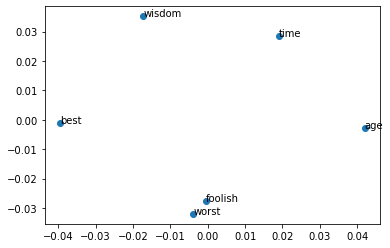

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = new_model.wv.__getitem__(new_model.wv.index_to_key)
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(new_model.wv.index_to_key)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [51]:
model.wv.similarity('best', 'worst')

0.13887984

In [52]:
model.wv.most_similar('foolish')

[('worst', 0.17018885910511017),
 ('best', 0.06408977508544922),
 ('wisdom', -0.01351495273411274),
 ('time', -0.023671677336096764),
 ('age', -0.05234675854444504)]

## Word2Vec vs BERT

**Embeddings**  
Word2Vec offers pre-trained word embeddings that anyone can use off-the-shelf. The embeddings are key: value pairs, essentially 1-1 mappings between words and their respective vectors. Word2Vec takes a single word as input and outputs a single vector representation of that word. 

Since BERT generates contextual embeddings, it takes as input a sequence (usually a sentence) rather than a single word. BERT needs to be shown the context that surrounding words provide before it can generate a word embedding. With BERT, you do need to have the actual model as the vector representations of words will vary based on the specific sequences you’re inputting. The output is a fixed-length vector representation of the input sentence. 

BERT or Bidirectional Encoder Representations from Transformers, is a technique that allows for bidirectional training of Transformers for natural language modeling tasks. Language models which are bidirectionally trained can learn deeper context from language than single-direction models. BERT generates context aware embeddings that allow for multiple representations (each representation, in this case, is a vector) of each word based on a given word’s context.

**Word Ordering**  
Word2Vec embeddings do not take into account the word position.

BERT model explicitly takes as input the position (index) of each word in the sentence before calculating its embedding.

**Out-of-Vocabulary**  
Since Word2Vec learns embeddings at word level, it can only generate embeddings for words that existed in it’s training set (aka it’s “vocabulary space”). This is a major drawback to Word2Vec - that it just doesn’t support Out-of-Vocabulary words.

Alternatively, BERT learns representations at the subword level, so a BERT model will have a smaller vocabulary space than the number of unique words in its training corpus. In turn, BERT is able to generate embeddings for words outside of its vocabulary space giving it a near infinite vocabulary. 